## Import libraries

In [2]:
from typing_extensions import TypedDict

class State(TypedDict):
    topic:str
    title:str
    content_summary:str


In [3]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
import os
from dotenv import load_dotenv
from IPython.display import Image, display
load_dotenv()

True

In [24]:
from langchain_groq import ChatGroq

#os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


llm=ChatGroq(model="qwen-2.5-32b")
#llm = ChatOpenAI(model="gpt-4o")
result=llm.invoke("Hello")
result


AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 30, 'total_tokens': 40, 'completion_time': 0.05, 'prompt_time': 0.003727075, 'queue_time': 0.235266362, 'total_time': 0.053727075}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_35f92f8282', 'finish_reason': 'stop', 'logprobs': None}, id='run-626ce3db-5c5a-44fa-8fb2-ba41f1b2aa51-0', usage_metadata={'input_tokens': 30, 'output_tokens': 10, 'total_tokens': 40})

In [4]:
def generate_title(state:State):
    """ LLM call to generate the title based on the given topic"""
    msg=llm.invoke(f"Generate a title based on topic{state['topic']}")
    return {'title':msg.content}

NameError: name 'State' is not defined

In [12]:
def generate_content(state:State):
    """Generate the conent based on the given title"""
    msg=llm.invoke(f"Generate a 500 word content on the title{state['title']}")
    return {'content_summary':msg.content}

In [13]:
## build the workflow graph

workflow= StateGraph(State)

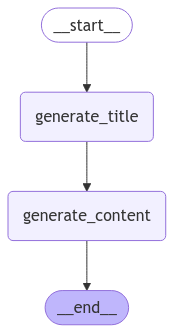

In [14]:
workflow.add_node("generate_title",generate_title)
workflow.add_node("generate_content",generate_content)

workflow.add_edge(START,"generate_title")
workflow.add_edge("generate_title","generate_content")
workflow.add_edge("generate_content",END)

## compile

chain=workflow.compile()

# Show workflow
display(Image(chain.get_graph().draw_mermaid_png()))


In [15]:
state = chain.invoke({"topic": "Agentic AI"})
state

{'topic': 'Agentic AI',
 'title': '"Unlocking the Future: The Power and Ethics of Agentic AI"',
 'content_summary': "Title: Unlocking the Future: The Power and Ethics of Agentic AI\n\nAs technology continues to evolve, Artificial Intelligence (AI) stands at the forefront of innovation, promising to revolutionize industries, enhance human capabilities, and solve complex problems. Among the various forms of AI, agentic AI, characterized by its autonomous decision-making and goal-directed behavior, holds particular promise. This type of AI is designed to operate independently, learning from its environment and making decisions to achieve specific goals, much like a human agent. While the potential benefits of agentic AI are vast, they come hand in hand with a myriad of ethical considerations that must be addressed to ensure the technology's responsible and beneficial development.\n\n### The Power of Agentic AI\n\nAgentic AI's ability to learn, adapt, and make decisions autonomously empowe

In [20]:
print("Topic:",state['topic'])
print(state['content_summary'])

Topic: Agentic AI
Title: Unlocking the Future: The Power and Ethics of Agentic AI

As technology continues to evolve, Artificial Intelligence (AI) stands at the forefront of innovation, promising to revolutionize industries, enhance human capabilities, and solve complex problems. Among the various forms of AI, agentic AI, characterized by its autonomous decision-making and goal-directed behavior, holds particular promise. This type of AI is designed to operate independently, learning from its environment and making decisions to achieve specific goals, much like a human agent. While the potential benefits of agentic AI are vast, they come hand in hand with a myriad of ethical considerations that must be addressed to ensure the technology's responsible and beneficial development.

### The Power of Agentic AI

Agentic AI's ability to learn, adapt, and make decisions autonomously empowers it to handle complex tasks and environments that were previously beyond the reach of traditional AI. I

## Parallel execution

In [24]:
class State(TypedDict):
    topic:str
    title:str
    content_summary:str
    combined_output:str


In [21]:
def generate_title(state:State):
    """ LLM call to generate the title based on the given topic"""
    msg=llm.invoke(f"Generate a title based on topic{state['topic']}")
    return {'title':msg.content}

In [22]:
def generate_content_(state:State):
    """Generate the conent based on the given title"""
    msg=llm.invoke(f"Generate a 500 word content on the title{state['topic']}")
    return {'content_summary':msg.content}

In [ ]:
def aggregator(state:State):
    """Combine the Title and the content_summary in a single output"""
    combined=f"Here is the topic{state['topic']}!\n\n"
    combined+=f"Title:{state['title']}\n\n"
    combined+=f"Content:{state['content_summary']}\n\n"
    return {"combined_output":combined}


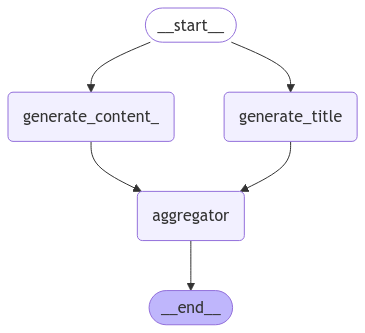

In [26]:
workflow=StateGraph(State)

workflow.add_node("generate_title",generate_title)
workflow.add_node("generate_content_",generate_content_)
workflow.add_node("aggregator",aggregator)


workflow.add_edge(START,"generate_title")
workflow.add_edge(START,"generate_content_")
workflow.add_edge("generate_title","aggregator")
workflow.add_edge("generate_content_","aggregator")
workflow.add_edge("aggregator",END)

chain=workflow.compile()

# Show workflow
display(Image(chain.get_graph().draw_mermaid_png()))


In [27]:
state=chain.invoke({"topic": "Agentic AI"})
state

{'topic': 'Agentic AI',
 'title': '"Unlocking the Potential of Agentic AI: A Journey into Autonomous Decision-Making Technologies"',
 'content_summary': "Agentic AI, a term often used to describe a level of artificial intelligence that operates with a high degree of autonomy and agency, represents a significant frontier in the field of AI technology. This form of AI can be viewed as an extension of current AI systems, which already perform a wide range of tasks with varying degrees of complexity and independence. However, Agentic AI takes this a step further by incorporating a more holistic approach to decision-making, learning, and adaptation, all while maintaining a level of independence that allows it to operate effectively in diverse and often unpredictable environments.\n\nAt the core of Agentic AI is the concept of agency, which refers to the capacity of an entity to act independently and make decisions based on its own goals and objectives. This is not simply about automation or

## add feedback

In [116]:
class State(TypedDict):
    topic:str
    title:str
    content:str
    feedback:str


In [117]:
def generate_title(state:State):
    """ LLM call to generate the title based on the given topic""" ## doc strings 
    msg=llm.invoke(f"Generate a title based on topic{state['topic']}")
    print('Title:',msg.content)
    return {'title':msg.content}

In [118]:
def generate_content(state:State):
    """Generate the conent based on the given title"""
    msg=llm.invoke(f"Generate a 500 word blog content on the title{state['title']}")
    print('Blog content:',msg.content)
    return {'content':msg.content}

In [119]:
def user_feedback(state:State):
    """If the user feedback is yes then end the process, if the user feedback is no regenerate the content based on the title"""
    feedback=input('is the content okay if okay type yes or if the content needs improvement give No')
    print(feedback)
    if feedback=='yes':
        return "yes"
    elif feedback=='No':
        return "No"

In [120]:
def new_content(state:State):
    msg=llm.invoke(f'Generate a new technical content on title {state['title']}')
    return {'content':msg.content}


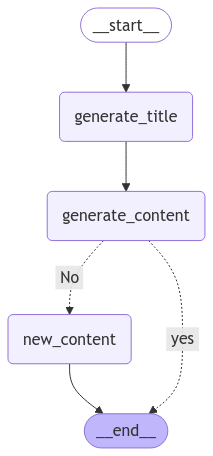

In [143]:
# System message
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
from langgraph.graph import MessagesState
from langgraph.checkpoint.memory import MemorySaver



# Graph
builder = StateGraph(State)

builder.add_node("generate_title",generate_title)
builder.add_node("generate_content",generate_content)
builder.add_node("new_content",new_content)

builder.add_edge(START,"generate_title")
builder.add_edge("generate_title","generate_content")
# builder.add_edge("generate_content","user_feedback")

# # builder.add_conditional_edges("user_feedback",user_feedback)

# builder.add_edge("user_feedback","generate_title")
builder.add_conditional_edges("generate_content",user_feedback,{"No":"new_content","yes":END})
builder.add_edge("new_content",END)
# builder.add_edge("user_feedback",END)

graph=builder.compile()


graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [94]:
state = graph.invoke({"topic": "Machine Learning"})
state

Title: "Exploring the Future of Data Analysis: Advances in Machine Learning"
Blog content: ### Exploring the Future of Data Analysis: Advances in Machine Learning

In an era where data is being generated at an unprecedented rate, the field of data analysis has become a pivotal component in driving business insights and technological advancements. At the heart of modern data analysis lies machine learning (ML), a subset of artificial intelligence that enables computers to learn from and make decisions based on data. This blog post explores the current and potential future advancements in machine learning and their implications for data analysis.

#### Current State of Machine Learning

Machine learning has already made significant strides in transforming how we process and interpret data. With the advent of deep learning, a more sophisticated form of machine learning, models have become capable of handling complex data types such as images, text, and sound with remarkable accuracy. Deep

{'topic': 'Machine Learning',
 'title': '"Exploring the Future of Data Analysis: Advances in Machine Learning"',
 'content': '### Exploring the Future of Data Analysis: Advances in Machine Learning\n\nIn the digital age, data analysis has transformed from a niche practice to a critical component of decision-making in various industries. The evolution of machine learning (ML) technologies has significantly influenced the landscape of data analysis, bringing about new possibilities for understanding complex data sets, predicting trends, and automating insights. This article explores the future of data analysis, focusing on the recent advances in machine learning that are shaping this transformation.\n\n#### The Convergence of Big Data and Machine Learning\n\nThe advent of big data has created an unprecedented need for sophisticated analytical tools that can process, interpret, and make predictions based on massive volumes of data. Machine learning algorithms, particularly those based on 

In [95]:
print(state['content'])

### Exploring the Future of Data Analysis: Advances in Machine Learning

In the digital age, data analysis has transformed from a niche practice to a critical component of decision-making in various industries. The evolution of machine learning (ML) technologies has significantly influenced the landscape of data analysis, bringing about new possibilities for understanding complex data sets, predicting trends, and automating insights. This article explores the future of data analysis, focusing on the recent advances in machine learning that are shaping this transformation.

#### The Convergence of Big Data and Machine Learning

The advent of big data has created an unprecedented need for sophisticated analytical tools that can process, interpret, and make predictions based on massive volumes of data. Machine learning algorithms, particularly those based on deep learning, are perfectly positioned to meet this challenge. These algorithms can automatically discover complex patterns in larg

## add human feedback

In [7]:
class State(TypedDict):
    topic:str
    title:str
    content:str
    feedback:str

In [9]:
# def human_feedback(state:State):
#     """If the user feedback is yes then end the process, if the user feedback is no regenerate the content based on the title"""
#     feedback=input('is the content okay if okay type yes or if the content needs improvement give No')
#     state['feedback']=feedback
#     if feedback=='yes':
#         return "yes"
#     elif feedback=="No":
#         return "No"

In [13]:
def generate_title(state:State):
    """ LLM call to generate the title based on the given topic"""
    msg=llm.invoke(f"Generate a title based on topic{state['topic']}")
    return {'title':msg.content}

In [76]:
def generate_content_(state:State):
    """Generate the conent based on the given title and human feedback if human feedback is yes then its a good content if human feedback is no then the content need to regenerate"""
    # if state['feedback']=="No":
    #     msg=llm.invoke(f"rewrite the same summary in more good technical content {state['content']}")
    # elif state['feedback']=="yes" or state['feedback']==None:
    #     msg=llm.invoke(f"Generate a 100 word blog summary on the title{state['title']}")
    msg=llm.invoke(f"Generate a 100 word blog summary on the title{state['title']}")
    return {'content_summary':msg.content}

In [77]:
from langgraph.types import interrupt,Command

# def human_feedback(state: State):
#     human_message = interrupt("human_input")
#     return {'feedback':human_message}

def human_feedback(state:State):
    is_approved = interrupt(
            {
                "question": "Is this correct?",
                # Surface the output that should be
                # reviewed and approved by the human.
                "content": state["content"]
            }
        )

    if is_approved:
        return Command(goto="generate_content")
    else:
        return Command(goto=END)

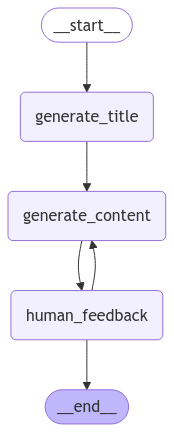

In [78]:
# System message
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
from langgraph.graph import MessagesState
from langgraph.checkpoint.memory import MemorySaver

# Graph
builder = StateGraph(State)

builder.add_node("generate_title",generate_title)
builder.add_node("generate_content",generate_content)
builder.add_node("human_feedback",human_feedback)


builder.add_edge(START,"generate_title")
builder.add_edge("generate_title","generate_content")
builder.add_edge("generate_content","human_feedback")

# # builder.add_conditional_edges("user_feedback",user_feedback)

builder.add_edge("human_feedback","generate_content")
# builder.add_conditional_edges("human_feedback",{"No":"generate_content","yes":END})
builder.add_edge("human_feedback",END)
# builder.add_edge("user_feedback",END)
memory = MemorySaver()
graph=builder.compile(checkpointer=memory)


display(Image(graph.get_graph().draw_mermaid_png()))

In [79]:
thread_config = {"configurable": {"thread_id": "sand"}}
initial_input={"topic":HumanMessage(content="Agentic AI")}



In [80]:
for event in graph.stream(initial_input,thread_config,stream_mode="values"):
    print(event)

{'topic': HumanMessage(content='Agentic AI', additional_kwargs={}, response_metadata={})}
{'topic': HumanMessage(content='Agentic AI', additional_kwargs={}, response_metadata={}), 'title': '"Exploring the Realm of Agentic AI: Autonomy and Intelligence in Technology"'}
Blog content: In the ever-evolving landscape of technology, one concept stands out as particularly transformative and exciting: Agentic Artificial Intelligence (AI). Agentic AI represents a significant leap forward in the capabilities of AI systems, integrating autonomy and intelligence in ways that promise to revolutionize how we interact with technology and how technology can serve us. This blog explores the realm of agentic AI, delving into its definitions, characteristics, and the implications of its development on society and technological progress.

### What is Agentic AI?

Agentic AI is a subset of AI that emphasizes autonomy and self-determination. Unlike traditional AI systems that operate under strict parameters

In [81]:
print(event['content'])

In the ever-evolving landscape of technology, one concept stands out as particularly transformative and exciting: Agentic Artificial Intelligence (AI). Agentic AI represents a significant leap forward in the capabilities of AI systems, integrating autonomy and intelligence in ways that promise to revolutionize how we interact with technology and how technology can serve us. This blog explores the realm of agentic AI, delving into its definitions, characteristics, and the implications of its development on society and technological progress.

### What is Agentic AI?

Agentic AI is a subset of AI that emphasizes autonomy and self-determination. Unlike traditional AI systems that operate under strict parameters set by their human creators, agentic AI systems are designed with the ability to make decisions and take actions autonomously, based on their own assessments and goals. This capability is what gives these systems their "agentic" nature—acting as agents with a degree of independence

In [82]:
state=graph.get_state(thread_config)
state.next

('human_feedback',)

In [94]:
new_content=graph.invoke(Command(resume=False),config=thread_config)
print(new_content['content'])

Blog content: In the rapidly evolving landscape of technology, artificial intelligence (AI) has taken center stage, revolutionizing the way we interact with machines and each other. Among the myriad of AI advancements, one particular subset has garnered significant attention for its potential to redefine the capabilities of technology: agentic AI. This form of AI is characterized by its autonomy and intelligence, two qualities that propel it into a realm where it can operate independently with a level of competence that closely mimics human decision-making and problem-solving.

### The Essence of Agentic AI

At its core, agentic AI is designed to possess agency, the ability to act independently and make decisions that are not solely based on pre-programmed instructions. This form of AI is not just a passive tool; it is a proactive entity that can learn, adapt, and evolve based on the environment it operates in and the tasks it performs. The intelligence embedded within agentic AI allow

In [92]:
for event in graph.stream(None,thread_config,stream_mode="values"):
    event


In [86]:
new_content['content']==event['content']

False

In [96]:
state=graph.get_state(thread_config)
state.next

('human_feedback',)

## new feedback

In [114]:
from typing import TypedDict

class GraphState(TypedDict):
    topic: str
    title: str
    content: str
    feedback: str


In [108]:
def generate_title(state:State):
    """ LLM call to generate the title based on the given topic""" ## doc strings 
    msg=llm.invoke(f"Generate a title based on topic{state['topic']}")
    print('Title:',msg.content)
    return {'title':msg.content}

In [107]:
def generate_content(state:State):
    """Generate the conent based on the given title"""
    msg=llm.invoke(f"Generate a 500 word blog content on the title{state['title']}")
    print('Blog content:',msg.content)
    return {'content':msg.content}

In [110]:


# # Define a function to generate a title based on the topic
# def generate_title(state: GraphState):
#     # Use a language model to generate a title
#     # llm = langchain.llms.OpenAI(model_name="gpt-4")
#     prompt = f"Generate a title for a blog post about {state['topic']}"
#     title = llm(prompt).strip()
#     state['title'] = title
#     return state

# # Define a function to generate content based on the title
# def generate_content(state: GraphState):
#     # Use a language model to generate content
#     # llm = langchain.llms.OpenAI(model_name="gpt-4")
#     prompt = f"Write a blog post titled {state['title']}"
#     content = llm(prompt).strip()
#     state['content'] = content
#     return state

# Define a function to collect human feedback
def collect_feedback(state: GraphState):
    # Simulate collecting feedback (replace with actual user input)
    feedback = input(f"Is the content good? (yes/no): ")
    state['feedback'] = feedback
    return {'feedback':feedback}


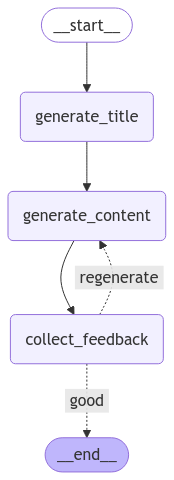

In [144]:
from langgraph.graph import StateGraph, START, END

# Create a new graph
workflow = StateGraph(GraphState)

# Add nodes
workflow.add_node("generate_title", generate_title)
workflow.add_node("generate_content", generate_content)  # Ensure this node is added
workflow.add_node("collect_feedback", collect_feedback)

# Add edges
workflow.add_edge(START, "generate_title")
workflow.add_edge("generate_title", "generate_content")
workflow.add_edge("generate_content", "collect_feedback")

# Conditional edge based on feedback
# Conditional edge based on feedback
def decide_next_step(state: GraphState):
    if state['feedback'].lower() == 'yes':
        return "end"  # Use 'END' as a string
    elif state['feedback'].lower() == 'no':
        return "regenerate"
    else:
        print("Invalid feedback. Please enter 'yes' or 'no'.")
        # Handle invalid feedback, e.g., ask for feedback again
        return collect_feedback(state)


workflow.add_conditional_edges(
    "collect_feedback",
    decide_next_step,
    {"good": END, "regenerate": "generate_content"}  # Ensure this matches the node name
)
# Compile the graph
app = workflow.compile()
app

In [140]:
state=app.invoke({"topic":"Machine learning"})
state

Title: "Exploring the Future of Data Analysis: Advances in Machine Learning"
Blog content: ### Exploring the Future of Data Analysis: Advances in Machine Learning

In the digital age, data has become a critical asset for businesses and governments alike. It drives decisions, shapes strategies, and influences outcomes in almost every sector. However, the sheer volume and complexity of the data collected daily pose significant challenges for traditional data analysis methods. This is where machine learning (ML) comes in, revolutionizing the way we process, analyze, and interpret data.

#### The Role of Machine Learning in Data Analysis

Machine learning is a subset of artificial intelligence that focuses on building systems that can learn from and make decisions based on data. Its applications in data analysis are vast, ranging from predictive analytics to pattern recognition and anomaly detection. ML algorithms can process large datasets more efficiently and accurately than traditional 

{'topic': 'Machine learning',
 'title': '"Exploring the Future of Data Analysis: Advances in Machine Learning"',
 'content': '### Exploring the Future of Data Analysis: Advances in Machine Learning\n\nIn the ever-evolving landscape of technology, data analysis stands out as a critical function that underpins decision-making processes across various sectors, including finance, healthcare, marketing, and beyond. As the volume of data continues to grow exponentially, the methods of data analysis are also evolving, with machine learning (ML) at the forefront of these advancements. This blog post aims to explore how advances in machine learning are shaping the future of data analysis, making it more efficient, insightful, and accessible.\n\n#### The Intersection of Data and Machine Learning\n\nData analysis involves collecting, processing, and interpreting data to uncover patterns, draw conclusions, and inform decisions. Machine learning, a subset of artificial intelligence (AI), involves a

In [141]:
print(state['content'])

### Exploring the Future of Data Analysis: Advances in Machine Learning

In the ever-evolving landscape of technology, data analysis stands out as a critical function that underpins decision-making processes across various sectors, including finance, healthcare, marketing, and beyond. As the volume of data continues to grow exponentially, the methods of data analysis are also evolving, with machine learning (ML) at the forefront of these advancements. This blog post aims to explore how advances in machine learning are shaping the future of data analysis, making it more efficient, insightful, and accessible.

#### The Intersection of Data and Machine Learning

Data analysis involves collecting, processing, and interpreting data to uncover patterns, draw conclusions, and inform decisions. Machine learning, a subset of artificial intelligence (AI), involves algorithms that can learn from and make predictions on data. The intersection of these two fields is particularly potent because ML a